<a href="https://colab.research.google.com/github/MehmetCanYildirim/Projects/blob/main/Simple_ANN_classification_fashion_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Fashion-MNIST dataset comprised of 70,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as dress, sandal, bag, sneaker, and more. The mapping of all 0-9 integers to class labels is listed below.

0: **T-shirt/top**

1: **Trouser**

2: **Pullover**

3: **Dress**

4: **Coat**

5: **Sandal**

6: **Shirt**

7: **Sneaker**

8: **Bag**

9: **Ankle boot**


This project is the simple version of classification problem by using simple Artificial Neural Network (ANN). At the end of the project, the classification process will be for 10 class.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [2]:
fashion_mnist_datasets = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist_datasets.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
classnames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

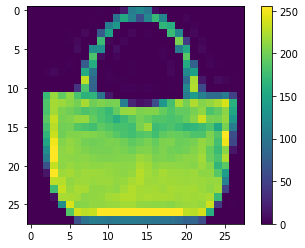

In [4]:
plt.figure()
plt.imshow(X_train[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
X_train = X_train/255.0
X_test = X_test/255

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [10]:
history = model.fit(x = X_train, y=y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


938/938 [==============================] - 3s 3ms/step - loss: 1.2624 - accuracy: 0.6200 - val_loss: 0.7672 - val_accuracy: 0.7694
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.6015 - accuracy: 0.8138 - val_loss: 0.5277 - val_accuracy: 0.8293
Epoch 3/10
938/938 [==============================] - 2s 3ms/step - loss: 0.4607 - accuracy: 0.8490 - val_loss: 0.4757 - val_accuracy: 0.8395
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4052 - accuracy: 0.8637 - val_loss: 0.4326 - val_accuracy: 0.8547
Epoch 5/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3727 - accuracy: 0.8726 - val_loss: 0.4083 - val_accuracy: 0.8620
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3517 - accuracy: 0.8780 - val_loss: 0.4101 - val_accuracy: 0.8566
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3341 - accuracy: 0.8839 - val_loss: 0.3837 - val_accuracy: 0.8659
Epoch 8/10
938/93

In [11]:
test_loss, test_accuracy = model.evaluate(x=X_test, y=y_test, verbose=2)

313/313 - 0s - loss: 0.3691 - accuracy: 0.8744


In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

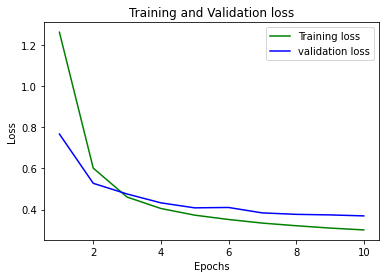

In [13]:

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()





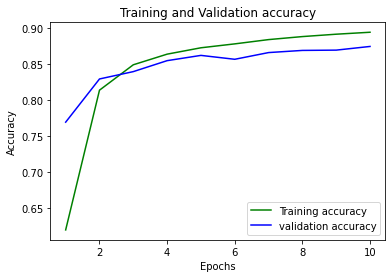

In [14]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

INTERFERENCE

In [15]:
X_test.shape

(10000, 28, 28)

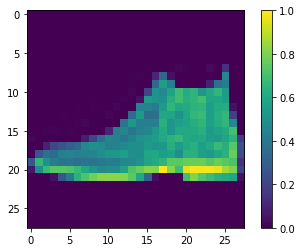

In [16]:
plt.figure()
plt.imshow(X_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
prediction = model.predict(np.array([X_test[0]]))

In [18]:
np.argmax(prediction)

9

In [19]:
X_test.shape

(10000, 28, 28)

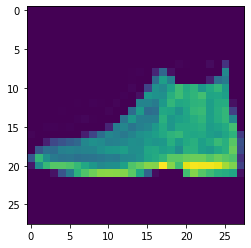

In [21]:
plt.imshow(X_test[0].reshape(28,28))